<a href="https://colab.research.google.com/github/RtjShreyD/CV-DL/blob/master/Contours_center.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import imutils
import cv2
from google.colab.patches import cv2_imshow

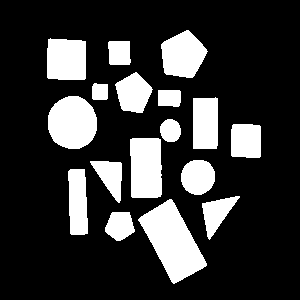

In [6]:
# load the image, convert it to grayscale, blur it slightly,
# and threshold it
image = cv2.imread("shapes_and_colors.png")
image = cv2.resize(image, (300, 300))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
cv2_imshow(thresh)

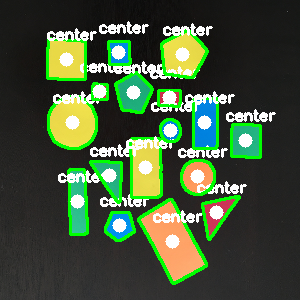

-1

In [9]:
# find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# loop over the contours
for c in cnts:
	# compute the center of the contour
	M = cv2.moments(c)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])
 
	# draw the contour and center of the shape on the image
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
	cv2.circle(image, (cX, cY), 7, (255, 255, 255), -1)
	cv2.putText(image, "center", (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
 
	# show the image
cv2_imshow(image)
cv2.waitKey(0)